<a href="https://colab.research.google.com/github/shubham-kajaria/Databases-and-SQL-for-Data-Science/blob/master/Python_db_con.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import ibm_db
import pandas
import ibm_db_dbi

dsn_hostname = "dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net"
dsn_uid = "vbf57544" # Write your username here
dsn_pwd = "password" # Write your password here

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            
dsn_port = "50000"                
dsn_protocol = "TCPIP"           

#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print("\n")


#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection
print("\n")
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


print("\n")

#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

print("\n")

#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)
print("\n")


#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn, createQuery)


#Construct the query - replace ... with the insert statement
insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

#execute the insert statement
insertStmt = ibm_db.exec_immediate(conn, insertQuery)


#replace ... with the insert statement that inerts the remaining two rows of data
insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')"


#execute the statement
insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)


#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
	print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"), end = " ")
	print (" LNAME:",  ibm_db.result(selectStmt, "LNAME"), " CITY:",  ibm_db.result(selectStmt, "CITY"), end = " ")
	print (" CCODE:",  ibm_db.result(selectStmt, "CCODE"))
	print("\n")

#update statement that changes the Rav's CITY to MOOSETOWN
update_query = "update INSTRUCTOR set CITY = 'MOOSETOWN' where FNAME = 'Rav'"

#execute the statement
updateStmt = ibm_db.exec_immediate(conn, update_query)


#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)


print("After Update:")

#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
	print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, 1), end = " ")
	print (" LNAME:",  ibm_db.result(selectStmt, 2), " CITY:",  ibm_db.result(selectStmt, 3), end = " ")
	print (" CCODE:",  ibm_db.result(selectStmt, 4))
	print("\n")

#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame
print(pdf.LNAME[0])

#print the entire data frame
print(pdf)

#check no. of rows and columns
print(pdf.shape)

ibm_db.close(conn)





Connected to database:  BLUDB as user:  vbf57544 on host:  dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net


DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.01.0405
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


 ID: 1  FNAME: Rav  LNAME: Ahuja  CITY: TORONTO  CCODE: CA


 ID: 2  FNAME: Raul  LNAME: Chong  CITY: Markham  CCODE: CA


 ID: 3  FNAME: Hima  LNAME: Vasudevan  CITY: Chicago  CCODE: US


After Update:
 ID: 1  FNAME: Rav  LNAME: Ahuja  CITY: MOOSETOWN  CCODE: CA


 ID: 2  FNAME: Raul  LNAME: Chong  CITY: Markham  CCODE: CA


 ID: 3  FNAME: Hima  LNAME: Vasudevan  CITY: Chicago  CCODE: US


Ahuja
   ID FNAME      LNAME       CITY CCODE
0   1   Rav      Ahuja  MOOSETOWN    CA
1   2  Raul      Chong    Markham    CA
2   3  Hima  Vasudevan    Chicago    US
(3

True

In [0]:
from sqlalchemy import create_engine
import ibm_db_sa
import ibm_db_dbi

In [0]:
%load_ext sql

In [0]:
%sql ibm_db_sa://vbf57544:password@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: vbf57544@BLUDB'

In [0]:
%%sql 
CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53);


 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
99 rows affected.


[]

In [0]:
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = 'Canada'

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [0]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [0]:
test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


Test Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


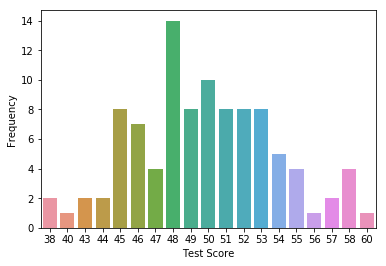

In [0]:
dataframe = test_score_distribution.DataFrame()
%matplotlib inline
import seaborn

plot = seaborn.barplot(x='Test Score',y='Frequency', data=dataframe)

In [0]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;    

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


In [0]:
%load_ext sql
%sql ibm_db_sa://vbf57544:password@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: vbf57544@BLUDB'

In [0]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

In [0]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [0]:
%%sql 

select count(*) from chicago_socioeconomic_data;
Select count(*) from chicago_socioeconomic_data where hardship_index > 50;
Select max(hardship_index) from chicago_socioeconomic_data;
Select community_area_name from chicago_socioeconomic_data where hardship_index = (Select max(hardship_index) from chicago_socioeconomic_data);
Select community_area_name from chicago_socioeconomic_data where per_capita_income_ > 60000;


 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
Done.
Done.
Done.
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


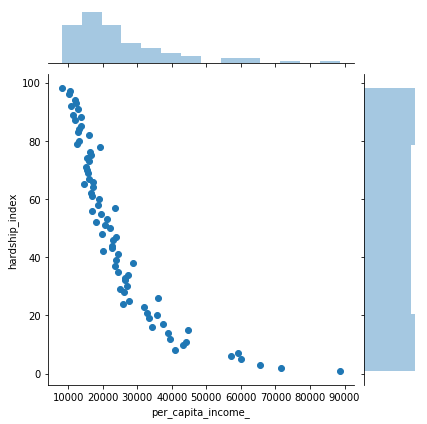

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

income_vs_hardship = %sql Select per_capita_income_, hardship_index from chicago_socioeconomic_data
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

In [0]:
%sql select d.dep_name,j.start_date from departments d inner join job_history j on j.dept_id = d.dept_id_dep where d.dept_id_dep = 5;



 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


dep_name,start_date
Software Group,2001-08-01
Software Group,2001-08-16
Software Group,2000-08-16
Software Group,2016-08-16


In [0]:
%sql select e.emp_id, e.l_name, e.dep_id, d.dept_id_dep, d.dep_name from employees e left outer join departments d on e.dep_id = d.dept_id_dep;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,l_name,dep_id,dept_id_dep,dep_name
E1005,Hussain,2,2,Architect Group
E1006,Allen,2,2,Architect Group
E1002,James,5,5,Software Group
E1010,Jacob,5,5,Software Group
E1004,Kumar,5,5,Software Group
E1003,Wells,5,5,Software Group
E1007,Thomas,7,7,Design Team
E1009,Jones,7,7,Design Team
E1008,Gupta,7,7,Design Team


In [0]:
%sql select e.emp_id, e.l_name, e.b_date, d.dept_id_dep, d.dep_name from employees e left outer join departments d on e.dep_id = d.dept_id_dep and year(e.b_date) < 1980;


 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


emp_id,l_name,b_date,dept_id_dep,dep_name
E1002,James,1972-07-31,5,Software Group
E1003,Wells,1980-08-10,None,None
E1004,Kumar,1985-07-20,None,None
E1005,Hussain,1981-01-04,None,None
E1006,Allen,1978-02-06,2,Architect Group
E1007,Thomas,1975-05-05,7,Design Team
E1008,Gupta,1985-05-06,None,None
E1009,Jones,1990-07-09,None,None
E1010,Jacob,1982-03-30,None,None


In [0]:
%sql select e.f_name, e.l_name,e.dep_id, d.dept_id_dep, d.dep_name from employees e full outer join departments d on e.dep_id = d.dept_id_dep;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,dep_id,dept_id_dep,dep_name
Alice,James,5,5,Software Group
Steve,Wells,5,5,Software Group
Santosh,Kumar,5,5,Software Group
Ahmed,Hussain,2,2,Architect Group
Nancy,Allen,2,2,Architect Group
Mary,Thomas,7,7,Design Team
Bharath,Gupta,7,7,Design Team
Andrea,Jones,7,7,Design Team
Ann,Jacob,5,5,Software Group


In [0]:
%sql select e.f_name, e.l_name,e.dep_id, d.dept_id_dep, d.dep_name from employees e full outer join departments d on e.dep_id = d.dept_id_dep and e.sex = 'M';


 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


f_name,l_name,dep_id,dept_id_dep,dep_name
Steve,Wells,5,5,Software Group
Santosh,Kumar,5,5,Software Group
Ahmed,Hussain,2,2,Architect Group
Bharath,Gupta,7,7,Design Team
Alice,James,5,None,None
Nancy,Allen,2,None,None
Mary,Thomas,7,None,None
Andrea,Jones,7,None,None
Ann,Jacob,5,None,None


In [0]:
%load_ext sql
%sql ibm_db_sa://vbf57544:password@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: vbf57544@BLUDB'

In [0]:
import pandas as pd

In [0]:
school_data = pd.read_csv('https://ibm.box.com/shared/static/f9gjvj1gjmxxzycdhplzt01qtz0s7ew7.csv')
%sql PERSIST school_data

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted school_data'

In [0]:
%sql Drop table school_data

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


[]

In [0]:
%sql select * from SYSCAT.tables order by create_time desc limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
VBF57544,SCHOOL_DATA,VBF57544,U,T,N,None,None,None,None,2020-05-02 19:55:23.194638,2020-05-02 19:55:23.194638,2020-05-02 19:55:23.194638,2020-05-02 19:56:03.802095,78,13,3098,566,15,0,16,-1,-1,-1,0,vbf57544space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,844,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2020-05-02 19:55:23.194638,0,,None,None,N,VBF57544,,,,0001-01-01,,N,R,N,-1.0,None
SYSTOOLS,MESSAGES,DB2INST1,U,T,N,None,None,None,None,2020-05-02 19:53:51.182987,2020-05-02 19:53:51.182987,2020-05-02 19:53:51.182987,2020-05-02 19:56:03.753030,4,145,5,201,1,0,1,-1,-1,-1,0,TS4CONSOLE,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,125,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2020-05-02 19:53:51.182987,0,,None,None,N,DB2INST1,,,,0001-01-01,,N,R,N,-1.0,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,VBF57544,U,T,N,None,None,None,None,2020-04-30 12:39:18.775925,2020-04-30 12:39:18.775925,2020-04-30 12:39:19.651584,2020-04-30 12:42:41.750907,10,12,3098,78,1,0,1,-1,-1,-1,0,vbf57544space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,111,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2020-04-30 12:39:18.775925,0,,None,None,N,VBF57544,,,,2020-05-01,,N,R,N,-1.0,None
VBF57544,INTERNATIONAL_STUDENT_TEST_SCORES,VBF57544,U,T,N,None,None,None,None,2020-04-30 00:41:26.856727,2020-04-30 00:41:26.856727,2020-04-30 00:41:26.856727,2020-04-30 02:08:07.559852,4,11,3098,99,1,0,1,-1,-1,-1,0,vbf57544space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,49,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2020-04-30 00:41:26.856727,0,,None,None,N,VBF57544,,,,0001-01-01,,N,R,N,-1.0,None
VBF57544,INSTRUCTOR,VBF57544,U,T,N,None,None,None,None,2020-04-30 00:40:55.020098,2020-04-30 00:40:55.117009,2020-04-30 00:40:55.117015,2020-04-30 00:42:41.449805,5,4,3098,3,1,0,1,-1,-1,-1,0,vbf57544space1,None,None,0,0,0,1,1,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,49,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2020-04-30 00:40:55.020098,0,,None,None,N,VBF57544,,,,0001-01-01,,N,R,N,-1.0,None


In [0]:
%sql select * from SYSCAT.tables where lower(tabschema) = lower('VBF57544')  and lower(tabname) = lower('school_data');

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks
VBF57544,SCHOOL_DATA,VBF57544,U,T,N,None,None,None,None,2020-05-02 19:55:23.194638,2020-05-02 19:55:23.194638,2020-05-02 19:55:23.194638,2020-05-02 19:56:03.802095,78,13,3098,566,15,0,16,-1,-1,-1,0,vbf57544space1,None,None,0,0,0,0,0,0,0,N,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY,1,,0,-1,N,,None,R,,N,,None,N,,F,None,0,N,999,0,0.0,844,0.0,None,1208,SYSIBM,IDENTITY,SYSIBM,IDENTITY,,0,2020-05-02 19:55:23.194638,0,,None,None,N,VBF57544,,,,0001-01-01,,N,R,N,-1.0,None


In [0]:
%%sql
select * from SYSCAT.COLUMNS limit 5;
select * from SYSCAT.COLUMNS where lower(tabname) = 'school_data';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
VBF57544,SCHOOL_DATA,School_ID,0,SYSIBM,INTEGER,4,0,None,None,None,Y,0,None,None,,,566,610543,609674,5,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,NAME_OF_SCHOOL,1,SYSIBM,VARCHAR,65,0,OCTETS,65,None,Y,1208,SYSIBM,IDENTITY,,,566,'Woodlawn Community Elementary Sch','Abraham Lincoln Elementary School',41,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,36,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,"Elementary, Middle, or High School",2,SYSIBM,VARCHAR,2,0,OCTETS,2,None,Y,1208,SYSIBM,IDENTITY,,,3,'MS','ES',7,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,2,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,Street_Address,3,SYSIBM,VARCHAR,30,0,OCTETS,30,None,Y,1208,SYSIBM,IDENTITY,,,566,'9912 S Avenue H','10015 S Leavitt St',22,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,17,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,City,4,SYSIBM,VARCHAR,7,0,OCTETS,7,None,Y,1208,SYSIBM,IDENTITY,,,1,'Chicago','Chicago',12,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,7,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,State,5,SYSIBM,VARCHAR,2,0,OCTETS,2,None,Y,1208,SYSIBM,IDENTITY,,,1,'IL','IL',7,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,2,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,ZIP_Code,6,SYSIBM,INTEGER,4,0,None,None,None,Y,0,None,None,,,51,60707,60607,5,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,Phone_Number,7,SYSIBM,VARCHAR,14,0,OCTETS,14,None,Y,1208,SYSIBM,IDENTITY,,,566,'(773) 535-9930','(773) 534-0146',19,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,14,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,Link,8,SYSIBM,VARCHAR,78,0,OCTETS,78,None,Y,1208,SYSIBM,IDENTITY,,,2,'','http://schoolreports.cps.edu/Scho',83,None,0,20,10,1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,78,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,SCHOOL_DATA,Network_Manager,9,SYSIBM,VARCHAR,40,0,OCTETS,40,None,Y,1208,SYSIBM,IDENTITY,,,20,'Southwest Side High School Networ','Austin-North Lawndale Elementary ',35,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,30,None,None,N,N,N,-1,-1.0,None,None,N,None


In [0]:
%%sql
select colname, typename, length from SYSCAT.COLUMNS where lower(tabname) = 'school_data';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


colname,typename,length
School_ID,INTEGER,4
NAME_OF_SCHOOL,VARCHAR,65
"Elementary, Middle, or High School",VARCHAR,2
Street_Address,VARCHAR,30
City,VARCHAR,7
State,VARCHAR,2
ZIP_Code,INTEGER,4
Phone_Number,VARCHAR,14
Link,VARCHAR,78
Network_Manager,VARCHAR,40


In [0]:
%sql select * \
from SYSIBM.SYSCOLUMNS \
where lower(TBNAME) = 'school_data'

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name,tbname,tbcreator,remarks,coltype,NULLS,codepage,dbcscodepg,length,scale,colno,colcard,high2key,low2key,avgcollen,keyseq,typename,typeschema,DEFAULT,longlength,logged,compact,nquantiles,nmostfreq,composite_codepage,partkeyseq,source_tabschema,source_tabname,hidden,GENERATED,inline_length,numnulls,avgcollenchar,sub_count,sub_delim_length,IDENTITY,compress,avgdistinctperpage,pagevarianceratio,implicitvalue,seclabelid,collationid,pctinlined,pctencoded,avgencodedcollen
School_ID,SCHOOL_DATA,VBF57544,None,INTEGER,Y,0,0,4,0,0,566,610543,609674,5,None,INTEGER,SYSIBM,None,4,,,20,10,0,0,None,None,,,0,0,-1,-1,-1,N,O,None,-1.0,None,0,None,-1,-1,-1.0
NAME_OF_SCHOOL,SCHOOL_DATA,VBF57544,None,VARCHAR,Y,1208,1200,65,0,1,566,'Woodlawn Community Elementary Sch','Abraham Lincoln Elementary School',41,None,VARCHAR,SYSIBM,None,65,,,20,10,1208,0,None,None,,,0,0,36,-1,-1,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
"Elementary, Middle, or High School",SCHOOL_DATA,VBF57544,None,VARCHAR,Y,1208,1200,2,0,2,3,'MS','ES',7,None,VARCHAR,SYSIBM,None,2,,,20,10,1208,0,None,None,,,0,0,2,-1,-1,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
Street_Address,SCHOOL_DATA,VBF57544,None,VARCHAR,Y,1208,1200,30,0,3,566,'9912 S Avenue H','10015 S Leavitt St',22,None,VARCHAR,SYSIBM,None,30,,,20,10,1208,0,None,None,,,0,0,17,-1,-1,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
City,SCHOOL_DATA,VBF57544,None,VARCHAR,Y,1208,1200,7,0,4,1,'Chicago','Chicago',12,None,VARCHAR,SYSIBM,None,7,,,20,10,1208,0,None,None,,,0,0,7,-1,-1,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
State,SCHOOL_DATA,VBF57544,None,VARCHAR,Y,1208,1200,2,0,5,1,'IL','IL',7,None,VARCHAR,SYSIBM,None,2,,,20,10,1208,0,None,None,,,0,0,2,-1,-1,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
ZIP_Code,SCHOOL_DATA,VBF57544,None,INTEGER,Y,0,0,4,0,6,51,60707,60607,5,None,INTEGER,SYSIBM,None,4,,,20,10,0,0,None,None,,,0,0,-1,-1,-1,N,O,None,-1.0,None,0,None,-1,-1,-1.0
Phone_Number,SCHOOL_DATA,VBF57544,None,VARCHAR,Y,1208,1200,14,0,7,566,'(773) 535-9930','(773) 534-0146',19,None,VARCHAR,SYSIBM,None,14,,,20,10,1208,0,None,None,,,0,0,14,-1,-1,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
Link,SCHOOL_DATA,VBF57544,None,VARCHAR,Y,1208,1200,78,0,8,2,'','http://schoolreports.cps.edu/Scho',83,None,VARCHAR,SYSIBM,None,78,,,20,10,1208,0,None,None,,,0,1,78,-1,-1,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0
Network_Manager,SCHOOL_DATA,VBF57544,None,VARCHAR,Y,1208,1200,40,0,9,20,'Southwest Side High School Networ','Austin-North Lawndale Elementary ',35,None,VARCHAR,SYSIBM,None,40,,,20,10,1208,0,None,None,,,0,0,30,-1,-1,N,O,None,-1.0,None,0,b'\x00\x00\x00\x02\xff\x00\xff\xff',-1,-1,-1.0


In [0]:
%%sql
select "School_ID" from school_data limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


School_ID
610038
610281
610185
609993
610513


In [0]:
%%sql
select count(*) from school_data where "Elementary, Middle, or High School" = 'ES';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
462


In [0]:
%sql select max("SAFETY_SCORE") from school_data;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
99


In [0]:
%%sql

select name_of_school, SAFETY_SCORE from school_data where "SAFETY_SCORE" = (select max("SAFETY_SCORE") from school_data);

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


In [0]:
%%sql
select AVERAGE_STUDENT_ATTENDANCE, name_of_school from school_data order by "AVERAGE_STUDENT_ATTENDANCE" desc limit 10;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


average_student_attendance,name_of_school
None,Velma F Thomas Early Childhood Center
98.40%,John Charles Haines Elementary School
97.80%,James Ward Elementary School
97.60%,Edgar Allan Poe Elementary Classical School
97.60%,Rachel Carson Elementary School
97.60%,Orozco Fine Arts & Sciences Elementary School
97.50%,Annie Keller Elementary Gifted Magnet School
97.40%,Andrew Jackson Elementary Language Academy
97.40%,Lenart Elementary Regional Gifted Center
97.30%,Disney II Magnet School


In [0]:
%%sql
select AVERAGE_STUDENT_ATTENDANCE, name_of_school from school_data order by "AVERAGE_STUDENT_ATTENDANCE" asc limit 5;


 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


average_student_attendance,name_of_school
57.90%,Richard T Crane Technical Preparatory High School
60.90%,Barbara Vick Early Childhood & Family Center
62.50%,Dyett High School
63.00%,Wendell Phillips Academy High School
66.30%,Orr Academy High School


In [0]:
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from school_data \
     order by Average_Student_Attendance \
     fetch first 5 rows only

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


In [0]:
%sql SELECT Name_of_School, REPLACE(Average_Student_Attendance, '%', '') \
     from school_data \
     order by Average_Student_Attendance \
     fetch first 5 rows only

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school,2
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30


In [0]:
%sql select Average_Student_Attendance, name_of_school \
from school_data \
where cast(replace(Average_Student_Attendance, '%', '') as double ) < 70 order by average_student_attendance;


 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


average_student_attendance,name_of_school
57.90%,Richard T Crane Technical Preparatory High School
60.90%,Barbara Vick Early Childhood & Family Center
62.50%,Dyett High School
63.00%,Wendell Phillips Academy High School
66.30%,Orr Academy High School
66.80%,Manley Career Academy High School
68.80%,Chicago Vocational Career Academy High School
69.60%,Roberto Clemente Community Academy High School


In [0]:
%%sql
select sum(COLLEGE_ENROLLMENT), COMMUNITY_AREA_NAME from school_data group by(COMMUNITY_AREA_NAME);

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1,community_area_name
6864,ALBANY PARK
4823,ARCHER HEIGHTS
1458,ARMOUR SQUARE
6483,ASHBURN
4175,AUBURN GRESHAM
10933,AUSTIN
1522,AVALON PARK
3640,AVONDALE
14386,BELMONT CRAGIN
1636,BEVERLY


In [0]:
%%sql
select sum(COLLEGE_ENROLLMENT) as c, COMMUNITY_AREA_NAME 
from school_data group by(COMMUNITY_AREA_NAME) 
order by c limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


c,community_area_name
140,OAKLAND
531,FULLER PARK
549,BURNSIDE
786,OHARE
871,LOOP


In [0]:
%sql select * from SYSCAT.COLUMNS where lower(colname) = 'hardship_index';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,HARDSHIP_INDEX,9,SYSIBM,DOUBLE,8,0,None,None,None,Y,0,None,None,,,78,+9.80000000000000E+001,+2.00000000000000E+000,9,None,0,20,10,1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None


In [0]:
%sql Select * from SYSCAT.COLUMNS where tabname = 'CHICAGO_SOCIOECONOMIC_DATA'

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,index,0,SYSIBM,BIGINT,8,0,None,None,None,Y,0,None,None,,,78,76,1,9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,CA,1,SYSIBM,DOUBLE,8,0,None,None,None,Y,0,None,None,,,78,+7.70000000000000E+001,+2.00000000000000E+000,9,None,0,20,10,1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,COMMUNITY_AREA_NAME,2,SYSIBM,CLOB,1048576,0,OCTETS,1048576,None,Y,1208,SYSIBM,IDENTITY,Y,N,-1,,,64,None,0,-1,-1,0,None,None,None,None,None,None,None,None,,164,100,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,PERCENT_OF_HOUSING_CROWDED,3,SYSIBM,DOUBLE,8,0,None,None,None,Y,0,None,None,,,56,+1.52000000000000E+001,+8.00000000000000E-001,9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,PERCENT_HOUSEHOLDS_BELOW_POVERTY,4,SYSIBM,DOUBLE,8,0,None,None,None,Y,0,None,None,,,68,+5.12000000000000E+001,+3.40000000000000E+000,9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,PERCENT_AGED_16_UNEMPLOYED,5,SYSIBM,DOUBLE,8,0,None,None,None,Y,0,None,None,,,67,+3.46000000000000E+001,+4.90000000000000E+000,9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,6,SYSIBM,DOUBLE,8,0,None,None,None,Y,0,None,None,,,70,+5.15000000000000E+001,+2.60000000000000E+000,9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,PERCENT_AGED_UNDER_18_OR_OVER_64,7,SYSIBM,DOUBLE,8,0,None,None,None,Y,0,None,None,,,67,+4.49000000000000E+001,+1.70000000000000E+001,9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,PER_CAPITA_INCOME_,8,SYSIBM,BIGINT,8,0,None,None,None,Y,0,None,None,,,78,71551,10402,9,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_SOCIOECONOMIC_DATA,HARDSHIP_INDEX,9,SYSIBM,DOUBLE,8,0,None,None,None,Y,0,None,None,,,78,+9.80000000000000E+001,+2.00000000000000E+000,9,None,0,20,10,1,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None


In [0]:
%sql select * from CHICAGO_SOCIOECONOMIC_DATA limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [0]:
%%sql
select * from 
school_data s inner join CHICAGO_SOCIOECONOMIC_DATA c 
on c.ca = s.COMMUNITY_AREA_NUMBER
and s.college_enrollment = 4368;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


School_ID,name_of_school,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,healthy_school_certified,Safety_Icon,safety_score,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,average_student_attendance,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,college_enrollment,General_Services_Route,Freshman_on_Track_Rate__,x_coordinate,y_coordinate,Latitude,Longitude,community_area_number,community_area_name,Ward,Police_District,Location,index,ca,community_area_name_1,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
609720,Albert G Lane Technical High School,HS,2501 W Addison St,Chicago,IL,60618,(773) 534-5400,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_609720.pdf,North-Northwest Side High School Network,NORTH-NORTHWEST SIDE COLLABORATIVE,Yes,Standard,Not on Probation,Level 1,No,Very Strong,88,NDA,NDA,Strong,62,Average,52,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,96.30%,2.1,96.20%,99.40%,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,None,None,None,None,NDA,NDA,NDA,NDA,19.1,19.5,19.9,20.1,1,23.4,3.5,67.9,92.2,79.8,4368,35,90.7,1158975.392,1923791.705,41.94661693,-87.69105603,5,NORTH CENTER,47,19,"(41.94661693, -87.69105603)",4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [0]:
%%sql
select hardship_index h , COLLEGE_ENROLLMENT ce, community_area_number from 
school_data s inner join CHICAGO_SOCIOECONOMIC_DATA c 
on c.ca = s.COMMUNITY_AREA_NUMBER
order by ce desc limit 1;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


h,ce,community_area_number
6.0,4368,5


In [0]:
%sql select ca, community_area_name, hardship_index from chicago_socioeconomic_data \
   where ca in \
   ( select community_area_number from school_data order by college_enrollment desc limit 1 )

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


ca,community_area_name,hardship_index
5.0,North Center,6.0


In [0]:
%sql select community_area_number,college_enrollment  from school_data order by college_enrollment desc limit 1

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_number,college_enrollment
5,4368


In [0]:
%load_ext sql
%sql ibm_db_sa://vbf57544:password@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: vbf57544@BLUDB'

In [0]:
%sql select * from CENSUS_DATA limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_number,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16__unemployed,percent_aged_25__without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income,hardship_index
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [0]:
%sql select * from CHICAGO_PUBLIC_SCHOOLS limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


School_ID,name_of_school,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,healthy_school_certified,Safety_Icon,safety_score,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,average_student_attendance,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,college_enrollment,General_Services_Route,Freshman_on_Track_Rate__,x_coordinate,y_coordinate,Latitude,Longitude,community_area_number,community_area_name,Ward,Police_District,Location
610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610038.pdf,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99,Very Strong,99,Strong,74,Strong,66,Strong,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.92449696,-87.64452163,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
610281,Adam Clayton Powell Paideia Community Academy Elementary School,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610281.pdf,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54,Strong,66,Strong,74,Very Strong,84,Strong,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.76032435,-87.55673627,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_610185.pdf,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61,NDA,NDA,Average,50,Weak,36,NDA,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.74711093,-87.73170248,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressReport_Eng/Spring2011Eng_609993.pdf,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,56,Average,44,Average,45,Weak,37,Strong,65,Average,48,Average,53,Strong,58,95.50%,10.4,95.80%,100.00%,76.9,NDA,26,24.7,61.8,49.7,39.2,27.2,69.7,60.6,9.1,18.2,11.1,9.6,0.9,2.4,Green,Green,42.9,25,NDA,NDA,NDA,NDA,NDA,NDA,

In [0]:
%sql select * from CHICAGO_CRIME_DATA limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


id,case_number,DATE,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,YEAR,updatedon,latitude,longitude,location
3512276,HK587712,2004-08-28 17:50:56,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,911,9,14,58,6,1155838,1873050,2004,02/10/2018 03:50:01 PM,41.80744050,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,1112,11,27,23,6,1152206,1906127,2004,02/28/2018 03:56:25 PM,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,2011-04-04 05:45:00,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,221,2,3,38,6,1177436,1876313,2011,02/10/2018 03:50:01 PM,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,2010-12-30 16:30:00,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,423,4,7,46,6,1194622,1850125,2010,02/10/2018 03:50:01 PM,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,2016-02-02 19:30:00,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,831,8,15,66,6,1155240,1860661,2016,02/10/2018 03:50:01 PM,41.77345530,-87.70648047,"(41.773455295, -87.706480471)"


In [0]:
%sql Select count(*) from CHICAGO_CRIME_DATA;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
533


In [0]:
%sql Select * from CHICAGO_CRIME_DATA limit 10;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


id,case_number,DATE,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,YEAR,updatedon,latitude,longitude,location
3512276,HK587712,2004-08-28 17:50:56,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,911,9,14,58,6,1155838,1873050,2004,02/10/2018 03:50:01 PM,41.80744050,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,2004-06-26 12:40:00,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,1112,11,27,23,6,1152206,1906127,2004,02/28/2018 03:56:25 PM,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,2011-04-04 05:45:00,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,221,2,3,38,6,1177436,1876313,2011,02/10/2018 03:50:01 PM,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,2010-12-30 16:30:00,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,423,4,7,46,6,1194622,1850125,2010,02/10/2018 03:50:01 PM,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,2016-02-02 19:30:00,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,831,8,15,66,6,1155240,1860661,2016,02/10/2018 03:50:01 PM,41.77345530,-87.70648047,"(41.773455295, -87.706480471)"
7732712,HS540106,2010-09-29 07:59:00,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),FALSE,FALSE,1323,12,27,24,6,1171668,1905607,2010,02/10/2018 03:50:01 PM,41.89644677,-87.64493868,"(41.896446772, -87.644938678)"
10769475,HZ534771,2016-11-30 01:15:00,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,1713,17,33,14,6,1154133,1933314,2016,02/10/2018 03:50:01 PM,41.97284491,-87.70860008,"(41.972844913, -87.708600079)"
4494340,HL793243,2005-12-16 16:45:00,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,TRUE,FALSE,213,2,3,38,6,1180448,1879234,2005,02/28/2018 03:56:25 PM,41.82387989,-87.61350386,"(41.823879885, -87.613503857)"
3778925,HL149610,2005-01-28 17:00:00,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,2211,22,19,72,6,1160129,1838040,2005,02/28/2018 03:56:25 PM,41.71128051,-87.68917910,"(41.711280513, -87.689179097)"
3324217,HK361551,2004-05-13 14:15:00,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,FALSE,FALSE,1733,17,35,21,6,1153590,1921084,2004,02/28/2018 03:56:25 PM,41.93929582,-87.71092344,"(41.939295821, -87.710923442)"


In [0]:
%sql select count(*) from CHICAGO_CRIME_DATA where lower(arrest) = 'true';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
163


In [0]:
%sql select * from syscat.columns where upper(tabname) = 'CHICAGO_CRIME_DATA';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
VBF57544,CHICAGO_CRIME_DATA,ID,0,SYSIBM,INTEGER,4,0,None,None,None,Y,0,None,None,,,533,11233321,23469,5,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,CASE_NUMBER,1,SYSIBM,VARCHAR,8,0,OCTETS,8,None,Y,1208,SYSIBM,IDENTITY,,,533,'JB155558','G040244',13,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,8,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,DATE,2,SYSIBM,TIMESTAMP,10,6,None,None,None,Y,0,None,None,,,488,'2018-02-16-08.18.00.000000','2001-01-19-18.39.03.000000',11,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,BLOCK,3,SYSIBM,VARCHAR,35,0,OCTETS,35,None,Y,1208,SYSIBM,IDENTITY,,,533,'132XX S RIVERDALE AVE','0000X E OHIO ST',23,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,18,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,IUCR,4,SYSIBM,VARCHAR,4,0,OCTETS,4,None,Y,1208,SYSIBM,IDENTITY,,,112,'930','041A',8,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,3,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,PRIMARY_TYPE,5,SYSIBM,VARCHAR,33,0,OCTETS,33,None,Y,1208,SYSIBM,IDENTITY,,,35,'THEFT','ASSAULT',15,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,10,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,DESCRIPTION,6,SYSIBM,VARCHAR,46,0,OCTETS,46,None,Y,1208,SYSIBM,IDENTITY,,,103,'VEHICULAR HIJACKING','AGG CRIM SEX ABUSE FAM MEMBER',21,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,16,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,LOCATION_DESCRIPTION,7,SYSIBM,VARCHAR,33,0,OCTETS,33,None,Y,1208,SYSIBM,IDENTITY,,,48,'VEHICLE NON-COMMERCIAL','ALLEY',16,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,11,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,ARREST,8,SYSIBM,VARCHAR,5,0,OCTETS,5,None,Y,1208,SYSIBM,IDENTITY,,,2,'TRUE','FALSE',10,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,5,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_CRIME_DATA,DOMESTIC,9,SYSIBM,VARCHAR,5,0,OCTETS,5,None,Y,1208,SYSIBM,IDENTITY,,,2,'TRUE','FALSE',10,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,5,None,None,N,N,N,-1,-1.0,None,None,N,None


In [0]:
%sql Select distinct primary_type from CHICAGO_CRIME_DATA where lower(location_description) like '%gas%';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


id,case_number,DATE,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,YEAR,updatedon,latitude,longitude,location
7505841,HS308747,2010-05-15 09:15:00,004XX E 95TH ST,890,THEFT,FROM BUILDING,GAS STATION,FALSE,FALSE,633,6,9,49,6,1180667,1842071,2010,02/10/2018 03:50:01 PM,41.72189586,-87.61384102,"(41.721895856, -87.613841024)"
4153041,HL005270,2005-07-12 23:00:00,008XX N CICERO AVE,820,THEFT,$500 AND UNDER,GAS STATION,FALSE,FALSE,1111,11,37,25,6,1144207,1904963,2005,02/10/2018 03:50:01 PM,41.89523990,-87.74581479,"(41.895239896, -87.745814792)"
5844831,HN647052,2007-10-14 04:31:26,062XX S DREXEL AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GAS STATION,TRUE,FALSE,313,3,20,42,18,1183081,1863726,2007,02/28/2018 03:56:25 PM,41.78126375,-87.60432695,"(41.781263748, -87.60432695)"
3046354,HJ753917,2003-11-12 01:40:00,052XX W ADDISON ST,031A,ROBBERY,ARMED: HANDGUN,GAS STATION,FALSE,FALSE,1634,16,38,15,3,1140892,1923436,2003,02/28/2018 03:56:25 PM,41.94599344,-87.75753456,"(41.945993442, -87.757534561)"
8875058,HV548880,2012-11-05 11:15:00,067XX S STATE ST,330,ROBBERY,AGGRAVATED,GAS STATION,FALSE,FALSE,322,3,6,69,3,1177438,1860407,2012,02/10/2018 03:50:01 PM,41.77228548,-87.62511546,"(41.772285481, -87.625115462)"
5827212,HN637742,2007-10-09 12:20:00,025XX N PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,TRUE,FALSE,2524,25,31,22,26,1149288,1916658,2007,02/28/2018 03:56:25 PM,41.92723512,-87.72684967,"(41.927235118, -87.726849666)"


In [0]:
%sql Select community_area_name from CENSUS_DATA where lower(community_area_name) like 'b%';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Belmont Cragin
Burnside
Brighton Park
Bridgeport
Beverly


In [0]:
%%sql Select cps.name_of_school from  
CHICAGO_PUBLIC_SCHOOLS cps 
where cps.community_area_number between 10 and 15 and lower(cps.healthy_school_certified)= 'yes';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


name_of_school
Rufus M Hitch Elementary School


In [0]:
%sql Select avg(safety_score) from  CHICAGO_PUBLIC_SCHOOLS;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
49.504873


In [0]:
%%sql Select sum(college_enrollment) as total_students, community_area_name from
CHICAGO_PUBLIC_SCHOOLS
group by community_area_name
order by total_students desc limit 5;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


total_students,community_area_name
14793,SOUTH LAWNDALE
14386,BELMONT CRAGIN
10933,AUSTIN
9915,GAGE PARK
9647,BRIGHTON PARK


In [0]:
%sql Select * from syscat.columns where tabschema = 'VBF57544' and lower(colname) like '%arrest%';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
VBF57544,CHICAGO_CRIME_DATA,ARREST,8,SYSIBM,VARCHAR,5,0,OCTETS,5,None,Y,1208,SYSIBM,IDENTITY,,,2,'TRUE','FALSE',10,None,0,20,10,0,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,5,None,None,N,N,N,-1,-1.0,None,None,N,None


In [0]:
%sql Select * from syscat.columns where tabschema = 'VBF57544' and upper(colname) like '%SAFETY_SCORE%';

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,colname,colno,typeschema,typename,length,scale,typestringunits,stringunitslength,DEFAULT,NULLS,codepage,collationschema,collationname,logged,compact,colcard,high2key,low2key,avgcollen,keyseq,partkeyseq,nquantiles,nmostfreq,numnulls,target_typeschema,target_typename,scope_tabschema,scope_tabname,source_tabschema,source_tabname,dl_features,special_props,hidden,inline_length,pctinlined,IDENTITY,rowchangetimestamp,GENERATED,text,compress,avgdistinctperpage,pagevarianceratio,sub_count,sub_delim_length,avgcollenchar,implicitvalue,seclabelname,rowbegin,rowend,transactionstartid,pctencoded,avgencodedcollen,qualifier,func_path,randdistkey,remarks
VBF57544,SCHOOL_DATA,SAFETY_SCORE,17,SYSIBM,SMALLINT,2,0,None,None,None,Y,0,None,None,,,86,99,5,3,None,0,20,10,53,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None
VBF57544,CHICAGO_PUBLIC_SCHOOLS,SAFETY_SCORE,17,SYSIBM,SMALLINT,2,0,None,None,None,Y,0,None,None,,,86,99,5,3,None,0,20,10,53,None,None,None,None,None,None,None,None,,0,-1,N,N,,None,O,None,-1.0,-1,-1,-1,None,None,N,N,N,-1,-1.0,None,None,N,None


In [0]:
%%sql select community_area_name from 
CENSUS_DATA where community_area_number in 
(select community_area_number from CHICAGO_PUBLIC_SCHOOLS order by SAFETY_SCORE limit 1);

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Washington Park


In [0]:
%sql select community_area_number, SAFETY_SCORE from CHICAGO_PUBLIC_SCHOOLS order by SAFETY_SCORE limit 10

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_number,safety_score
40,1
67,5
26,6
71,11
69,13
40,13
42,13
49,14
63,14
67,15


In [0]:
%%sql select PER_CAPITA_INCOME from 
CENSUS_DATA cd, CHICAGO_PUBLIC_SCHOOLS cps 
where cps.community_area_number = cd.community_area_number
and cps.SAFETY_SCORE = 1;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


per_capita_income
13785


In [0]:
%sql select count(*) from CHICAGO_PUBLIC_SCHOOLS;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
566


In [0]:
%sql select count(distinct(community_area_number)) from CHICAGO_PUBLIC_SCHOOLS;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
77


In [0]:
%sql select count(distinct(community_area_name)) from CHICAGO_PUBLIC_SCHOOLS;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
77


In [0]:
%sql select * from CHICAGO_PUBLIC_SCHOOLS where community_area_name is null;

 * ibm_db_sa://vbf57544:***@dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net:50000/BLUDB
Done.


School_ID,name_of_school,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,Collaborative_Name,Adequate_Yearly_Progress_Made_,Track_Schedule,CPS_Performance_Policy_Status,CPS_Performance_Policy_Level,healthy_school_certified,Safety_Icon,safety_score,Family_Involvement_Icon,Family_Involvement_Score,Environment_Icon,Environment_Score,Instruction_Icon,Instruction_Score,Leaders_Icon,Leaders_Score,Teachers_Icon,Teachers_Score,Parent_Engagement_Icon,Parent_Engagement_Score,Parent_Environment_Icon,Parent_Environment_Score,average_student_attendance,Rate_of_Misconducts__per_100_students_,Average_Teacher_Attendance,Individualized_Education_Program_Compliance_Rate,Pk_2_Literacy__,Pk_2_Math__,Gr3_5_Grade_Level_Math__,Gr3_5_Grade_Level_Read__,Gr3_5_Keep_Pace_Read__,Gr3_5_Keep_Pace_Math__,Gr6_8_Grade_Level_Math__,Gr6_8_Grade_Level_Read__,Gr6_8_Keep_Pace_Math_,Gr6_8_Keep_Pace_Read__,Gr_8_Explore_Math__,Gr_8_Explore_Read__,ISAT_Exceeding_Math__,ISAT_Exceeding_Reading__,ISAT_Value_Add_Math,ISAT_Value_Add_Read,ISAT_Value_Add_Color_Math,ISAT_Value_Add_Color_Read,Students_Taking__Algebra__,Students_Passing__Algebra__,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net_Change_EXPLORE_and_PLAN,11th Grade Average ACT (2011),Net_Change_PLAN_and_ACT,College_Eligibility__,Graduation_Rate__,College_Enrollment_Rate__,college_enrollment,General_Services_Route,Freshman_on_Track_Rate__,x_coordinate,y_coordinate,Latitude,Longitude,community_area_number,community_area_name,Ward,Police_District,Location
